Customer segmentation is a crucial aspect of retail and marketing strategy. Mall
Customer Segmentation is a common data analysis project that involves categorizing
mall customers into distinct groups or segments based on various characteristics and
behaviors. This segmentation is valuable for tailoring marketing efforts, optimizing
store layouts, and enhancing customer experiences
Task:
Understand the data
Data Preprocessing
Machine Learning approach with clustering algorithm


In [191]:
import numpy as np
import pandas as pd


In [192]:
df=pd.read_csv('/content/Mall_Customers.csv')

In [193]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [194]:
df.shape

(200, 5)

In [195]:
df_new=df.drop(columns=['CustomerID'])

In [196]:
df_new.head()


,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [197]:
df_new.Gender.value_counts()

Female    112
Male       88
Name: Gender, dtype: int64

In [198]:
##Since no particular target variable is there we don't focus on any imbalanced particular column so no need of balancing
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Gender                  200 non-null    object
 1   Age                     200 non-null    int64 
 2   Annual Income (k$)      200 non-null    int64 
 3   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 6.4+ KB


In [199]:
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: >

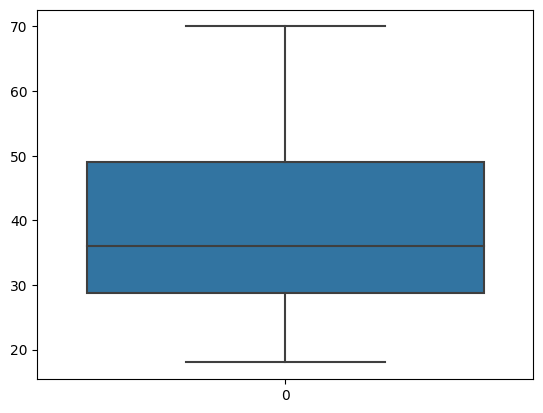

In [200]:
sns.boxplot(df_new.Age)

<Axes: >

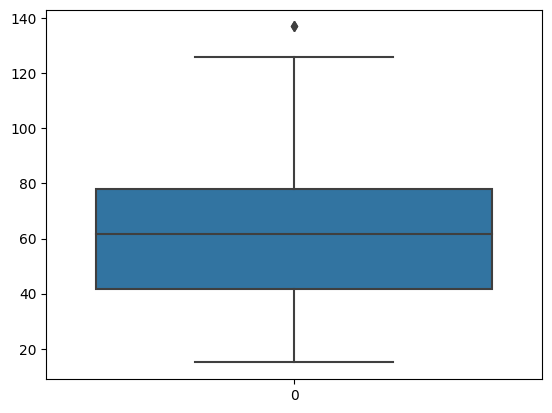

In [201]:
sns.boxplot(df_new['Annual Income (k$)'])

<Axes: >

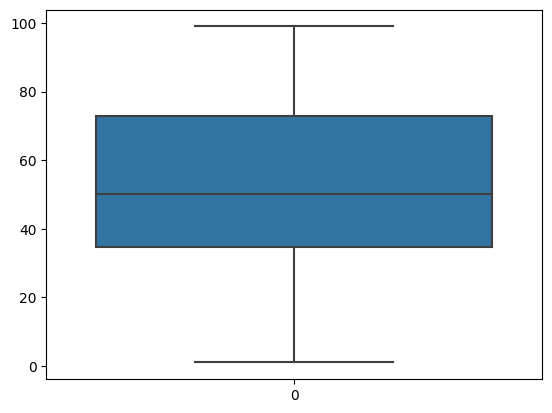

In [202]:
sns.boxplot(df_new['Spending Score (1-100)'])

<Axes: >

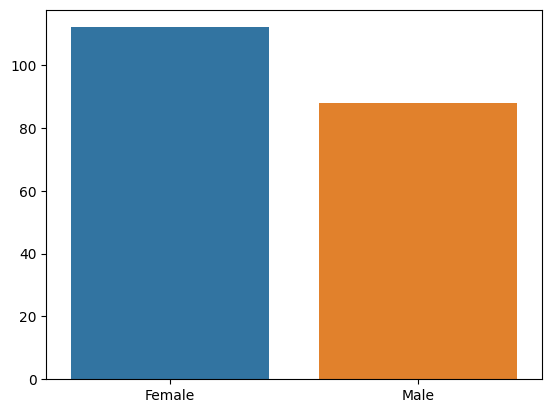

In [203]:
## again no need for checking correlation as we are not working for any particular column so no need to check any dependency as well
sns.barplot(x=df_new.Gender.value_counts().index, y=df_new.Gender.value_counts().values)#plotting the occurence of male and femalein gennder column

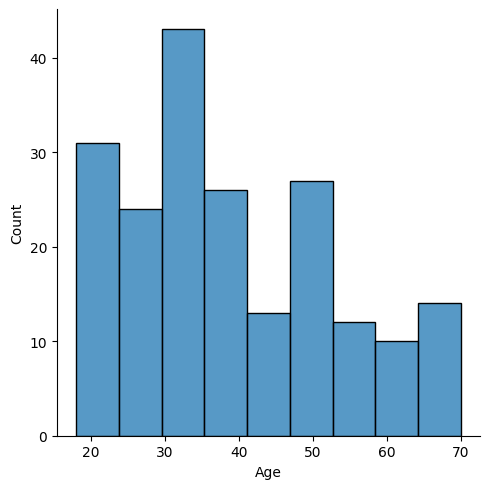

In [204]:
sns.displot(df_new.Age)#distribution of age

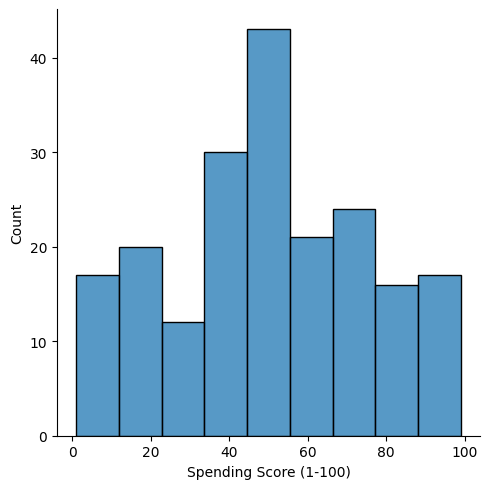

In [205]:
sns.displot(df_new['Spending Score (1-100)'])

In [206]:
#now since gender is categorical we will need to encode it
from sklearn.preprocessing import LabelEncoder

In [207]:
le=LabelEncoder()

In [208]:
df_new.Gender=le.fit_transform(df_new.Gender)

In [209]:
df_new.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40


In [210]:
from sklearn.preprocessing import MinMaxScaler

In [211]:
scale=MinMaxScaler()

In [212]:
df_scaled=pd.DataFrame(scale.fit_transform(df_new.iloc[:,1:]),columns=df_new.iloc[:,1:].columns)

In [213]:
df_scaled.head()##scaling data for equal contribution of every columns

,Age,Annual Income (k$),Spending Score (1-100)
0,0.019231,0.000000,0.387755
1,0.057692,0.000000,0.816327
2,0.038462,0.008197,0.051020
3,0.096154,0.008197,0.775510
4,0.250000,0.016393,0.397959


In [214]:
wcss=[]##within cluster sum square to store wcss for each no. of clusters

In [215]:
from sklearn.cluster import KMeans

In [216]:
for i in range (1,13):
  kmeans =cluster.KMeans(n_clusters=i, init='k-means++', random_state=42 )
  kmeans.fit(df_scaled)
  wcss.append(kmeans.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

In [217]:
wcss

[37.401482160359436,
 22.56077488260975,
 17.371946164404164,
 12.650287676229915,
 10.303964892534122,
 8.385099035848985,
 7.4634835751996285,
 6.248886770318164,
 5.483963011692648,
 5.032571050877738,
 4.564291908894802,
 4.2052680602469925]

Text(0, 0.5, 'error')

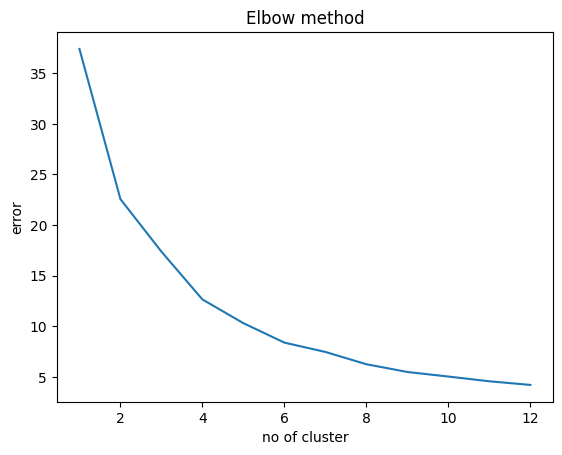

In [218]:
plt.plot(range(1,13),wcss)
plt.title('Elbow method')
plt.xlabel('no of cluster')
plt.ylabel('error')

In [219]:
#from the elbow map above we can clearly determine the value of k=4
km=KMeans(n_clusters=5)

In [226]:
km.fit(df_scaled)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=5)

In [227]:
sample=[[20,16,6]]#0 means female




In [228]:

sample=pd.DataFrame(scale.transform(sample))

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


In [230]:
km.predict(sample)#it lies in cluster 2

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


array([1], dtype=int32)

In [231]:
from sklearn.metrics import silhouette_score
silhouette_score(df_scaled, km.labels_)


0.40611743307078185

In [232]:
km.inertia_

10.303964892534122

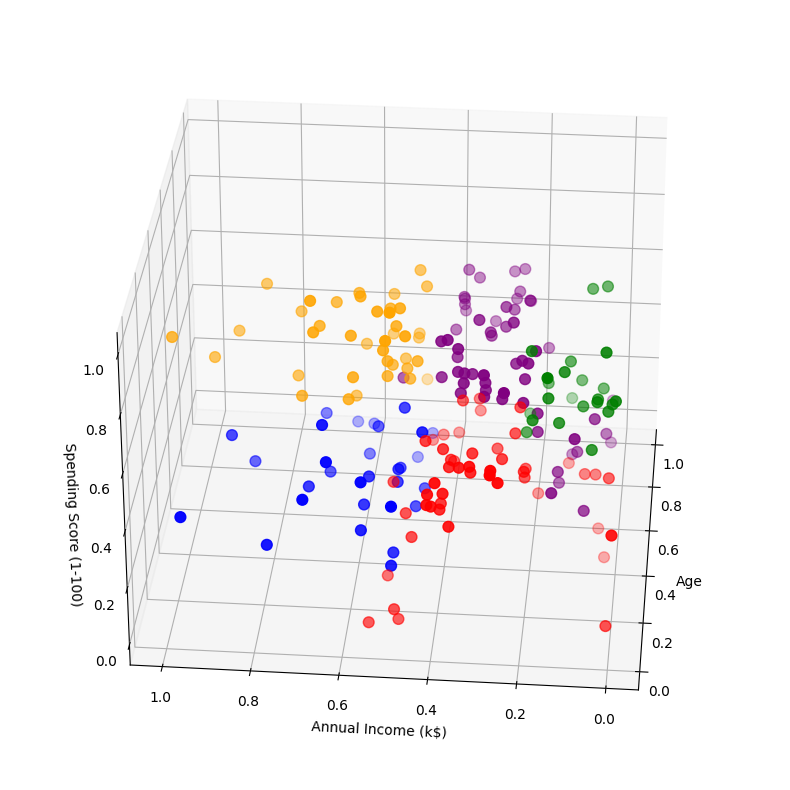

In [234]:
clusters=km.predict(df_scaled)
df_scaled["label"]=clusters
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


fig = plt.figure(figsize=(30,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df_scaled.Age[df_scaled.label == 0], df_scaled["Annual Income (k$)"][df_scaled.label == 0], df_scaled["Spending Score (1-100)"][df_scaled.label == 0], c='blue', s=60)
ax.scatter(df_scaled.Age[df_scaled.label == 1], df_scaled["Annual Income (k$)"][df_scaled.label == 1], df_scaled["Spending Score (1-100)"][df_scaled.label == 1], c='red', s=60)
ax.scatter(df_scaled.Age[df_scaled.label == 2], df_scaled["Annual Income (k$)"][df_scaled.label == 2], df_scaled["Spending Score (1-100)"][df_scaled.label == 2], c='green', s=60)
ax.scatter(df_scaled.Age[df_scaled.label == 3], df_scaled["Annual Income (k$)"][df_scaled.label == 3], df_scaled["Spending Score (1-100)"][df_scaled.label == 3], c='orange', s=60)
ax.scatter(df_scaled.Age[df_scaled.label == 4], df_scaled["Annual Income (k$)"][df_scaled.label == 4], df_scaled["Spending Score (1-100)"][df_scaled.label == 4], c='purple', s=60)
ax.view_init(30, 185)
plt.xlabel("Age")
plt.ylabel("Annual Income (k$)")
ax.set_zlabel('Spending Score (1-100)')
plt.show()

In [135]:
## visualization of clusters